#  Predicting University Admits using Logistic Regression

Logistic Regression에서 weights값들을 학습시키는 방법을 기술합니다. 

### Likelihood

Sum-squred error 에서 cost값을 낮추려고 하였습니다. <br>
Logistic Regression에서 사용되는 cost function을 알기 위해서는 Likelihood를 먼저 알아야 하고, <br>
Likelihood는 sum-squred error와는 다르게 maximize해야 합니다. 

<i class="fa fa-exclamation-circle" aria-hidden="true" style="color:#777;"> 여기서 bold체는 series (list)입니다.</i>

### $$ L(\mathbf{w}) = P(\mathbf{y}\ |\ \mathbf{x};\mathbf{w}) = \prod^n_{i=1} P(y^{(i)}\ |\ x^{(i)}; \mathbf{w}) = \prod^n_{i=1} \left( \phi(z^{(i)} \right)^{y^{(i)}} \left(1 - \phi(z^{(i)}) \right)^{1-y^{(i)}} $$

### Log-Likelihood function

실제로는 likelihood가 그대로 쓰이는 경우는 없고, 계산의 편의상 log-likelihood를 사용하는 경우가 일반적입니다.

* log (natural)를 붙임으로서 numerical underflow (likelihood값이 너무 작을때 발생) 를 낮춰줍니다.
* product of factors 를 summation of factors로 바꿔줌으로서, derivative를 구할때 좀더 쉽게 계산할수 있도록 해줍니다.


### $$ l(\mathbf{w}) = \ln L(\mathbf{w}) = \sum^n_{i=1} y^{(i)}  \ln \left( \phi(z^{(i)}) \right) + \left(1 - y^{(i)} \right) \ln \left( 1 - \phi(z^{(i)}) \right) $$

### Cost Function

Grandient ascent를 사용해서 위의 log-likelihood를 그대로 사용할수도 있습니다.<br>
하지만 log-likelihood를 약간 변형하여 cost function으로 만들어주고 여기에 gradient descent를 사용할수 있도록 하겠습니다.<br>
그냥 위의 공식에서 minus를 2개를 더 붙여준것밖에 달라진것이 없습니다.

### $$ J(\mathbf{w}) = \sum^n_{i=0} -y^{(i)} \ln \left( \phi(z^{(i)}) \right) - \left(1 - y^{(i)} \right) \ln \left( 1 - \phi(z^{(i)}) \right)  $$

### Gradient Descent

Gradient Descent는 2가지 방법으로 process될 수 있습니다. <br>
하나는 log-likelihood를 maximize하는 방법과, 다른 하나는 위의 cost function을 값을 minimize 하는 방법입니다.<br>
먼저 log-likelihood를 maximize하려면 partial derivative of the log-likelihood function을 알아야 합니다.

아래는 $ w_j $ weight의 partial derivative를 구하는 것입니다.<br>
즉 전체 weights값이 아니기 때문에 $ \sum $ 같은것이 빠져있습니다.

<i class="fa fa-exclamation-circle" aria-hidden="true" style="color:#777;"> 아래의 공식은 실제 집접 구한 공식이기 때문에 틀린부분이 있을수도 있습니다.</i>

<span class="fa fa-exclamation-circle" aria-hidden="true" style="color:#777;"></span> $ \frac{d}{dx} \ln x = \frac{1}{x}$

<span class="fa fa-exclamation-circle" aria-hidden="true" style="color:#777;"></span> $ \frac{d}{dx} \ln f(x) = \frac{1}{f(x)} f^{\prime}(x)$

### $$ \frac{\partial}{\partial w_j} l(\mathbf{w}) = y \cdot \ln(\phi(z)) + (1-y) \cdot \ln(1-\phi(z)) $$

### $$ = \frac{\partial}{\partial w_j} y \cdot \ln(\phi(z)) + \frac{\partial}{\partial w_j} (1-y) \cdot \ln(1-\phi(z))  $$

### $$ = y \cdot \frac{1}{\phi(z)} \cdot \frac{\partial}{\partial w_j} \phi(z) + (1-y) \cdot \frac{1}{1-\phi(z)} \cdot \frac{\partial}{\partial w_j} (1 - \phi(z)) $$

### $$ = \left( y \cdot \frac{1}{\phi(z)} - (1-y) \cdot \frac{1}{1-\phi(z)} \right) \frac{\partial}{\partial w_j} \phi(z) $$

여기에서 derivative of the sigmoid function 값인 $ \phi(z)(1-\phi(z)) $를 대입해줍니다.

<span class="fa fa-exclamation-circle" aria-hidden="true" style="color:#777;"></span> $ \frac{d}{dx} f(g(x)) = f^{\prime}(g(x)) \cdot g^{\prime}(x)$

<span class="fa fa-exclamation-circle" aria-hidden="true" style="color:#777;"></span> $ \frac{d}{dx} z = w_j x_j = 1 \cdot x_j $

### $$ =  \left( y \cdot \frac{1}{\phi(z)} - (1-y) \cdot \frac{1}{1-\phi(z)} \right) \phi(z)(1-\phi(z)) \frac{\partial}{\partial w_j} z  $$

### $$ = \left( y \cdot (1-\phi(z)) - (1-y) \cdot \phi(z) \right) x_j $$

### $$ = ((y - \phi(z)) \cdot x_j $$

목표를 다시 상기시키면, maximize the log-likelihood 입니다. <br>
즉 포인트는 negative gradient ($ \Delta w = -\eta \nabla l(\mathbf{w}) $)를 하는게 아니라 likelihood를 최대한 키우는 것 입니다.<br>
(즉 앞에 minus기호를 뺍니다.)

### $$ w_j := w_j + \eta \sum^n_{i=1} \left( y^{i} - \phi(z^{(i)})  \right) x_j $$

위 공식의 일반적인 표현은 다음과 같이 합니다.

### $$ \mathbf{w} := \mathbf{w} +  \Delta \mathbf{w} $$

### $$ \Delta \mathbf{w} = \eta \nabla l(\mathbf{w})$$

반대로 cost function $ J $의 값을 낮춰서 Gradient descent를 구현할수도 있습니다.

### $$ \Delta w_j = -\eta \frac{\partial J}{\partial w_j} = \eta \sum^n_{i=1} \left( y^{(i)} - \phi(z^{(i)}) \right) x^{(i)}_j $$

### $$ \mathbf{w} := \mathbf{w} + \Delta \mathbf{w}, \Delta \mathbf{w} = - \eta \nabla J(\mathbf{w}) $$

In [1]:
%pylab inline
import numpy as np
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


### Data Preparation

In [2]:
breast = datasets.load_breast_cancer()
data = breast.data
target = breast.target

# Shuffle
_rands = np.random.permutation(len(data))
data = data[_rands]
target = target[_rands]

# Min-max Standardization
for i in xrange(data.shape[1]):
    data[:, i] = (data[:, i] - data[:,i].min()) / (data[:,i].max() - data[:,i].min())
    
x_trains = data[:430]
y_trains = target[:430]
x_tests = data[430:]
y_tests = target[430:]

### Implement Logistic Regression

In [36]:
class LogisticRegression(object):
    
    def __init__(self, eta=0.01):
        self.w = np.random.rand(30+1)
        self.eta = eta
        
    def predict(self, X):
        X = np.array(X)
        return self.sigmoid(X.dot(self.w[1:]) + self.w[0]) 
        
    def sigmoid(self, x):
        return 1./(1. + np.exp(-x))
    
    def dsigmoid(self, y):
        return y * (1 - y)

    def likelihood(self, Z, Y):
        return np.prod(Z**Y * (1.-Z)**(1-Y))
    
    def log_likelihood(self, Z, Y):
        return np.sum(Y * np.log(Z) + (1 - Y) * np.log(1 - Z))
            
    def shuffle(self, X, Y):
        rands = np.random.permutation(len(X))
        return X[rands], Y[rands]
    
    def sample(self, X, Y, n=1):
        N = len(X)
        rands = np.random.randint(0, N, size=n)
        return X[rands], Y[rands]
    
    def cost(self, Z, Y):
        return - np.sum(Y * np.log(Z) + (1 - Y) * np.log(1 - Z))
        
    def quantizer(self, yhat):
        # This is just a unit step function
        yhat[yhat >= 0.5] = 1
        yhat[yhat < 0.5] = 0
        return yhat
                
    def evaluate(self, X, Y):
        N = len(X)
        correct_n = 0
        for i in xrange(N):
            yhat = self.quantizer(self.predict([X[i]]))
            if Y[i] == yhat:
                correct_n += 1.
        return correct_n/N
    
    def train(self, X, Y, episode_n=10):
        p = {
            'costs': [],
            'bias': [],
        }
        for _ in xrange(episode_n):
            losses = []
            for i in range(5000):
                sp_x, sp_y = self.sample(X, Y, n=10)
                yhat = self.predict(sp_x)
                loss = self.gradient_ascent(yhat, sp_x, sp_y)
                losses.append(loss)
                
                if i%1000 == 0:
                    X, Y = self.shuffle(X, Y)
                
            cost = sum(losses)/len(losses)
            p['costs'].append(cost)
            p['bias'].append(self.w[0])
            print 'cost: %6.4f' % cost
        return p
    
    def gradient_ascent(self, yhat, x, y):
        loss = y - yhat
        delta = self.eta * x.T.dot(loss)
        self.w[1:] += delta
        self.w[0] = loss.sum()
        return 0.5 * loss**2

### Just calculate likelihood & log-likelihood

In [ ]:
lr = LogisticRegression()
predicted_y = lr.predict(X)

plot_x = np.arange(len(Y))
title(u'predicted result with randomly-generated weights')
ylabel('predicted')
scatter(plot_x[Y == 0], predicted_y[Y == 0], color='#555555', label='y=0')
scatter(plot_x[Y == 1], predicted_y[Y == 1], color='red', label='y=1')
legend()

print u'likelihood의 경우는 numeric underflow가 심하게 나타납니다.'
print '-'*60
print 'likelihood:\t', lr.likelihood(predicted_y, Y)
print 'log-likelihood:\t', lr.log_likelihood(predicted_y, Y)

### Calculate cost 

cost functiond은 log-likelihood를 변형하여 (마이너스 붙여주기) gradient descent를 사용할수 있도록 해줍니다.<br>
하나의 샘플을 갖고서 cost를 구하면 다음과 같습니다.

만약 $ y = 1 $ 이라면.. <br>
$ J(\phi(z), y; \mathbf{w}) = -\ln \left( \phi(z) \right) $

만약 $ y = 0 $ 이라면.. <br>
$ J(\phi(z), y; \mathbf{w}) = -\ln \left( 1 - \phi(z) \right) $

아래 plot을 보면.. y값과 예측값이 맞아 떨어질수록 cost값 또한 동일하게 줄어드는 것을 알 수 있습니다.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


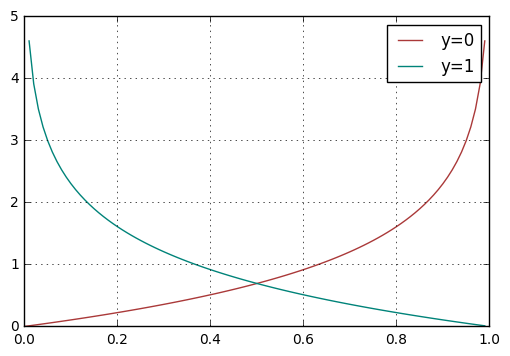

In [9]:
def y_equal_1(Z):
    return -np.log(Z)

def y_equal_0(Z):
    return -np.log(1.-Z)

_Z = np.arange(0, 1, 0.01)

grid()
plot(_Z, y_equal_0(_Z), color='#AA3939', label='y=0')
plot(_Z, y_equal_1(_Z), color='#008379', label='y=1')
legend()

cost: 0.8871
cost: 0.4112
cost: 0.3226
cost: 0.2711
cost: 0.2456
cost: 0.2229
cost: 0.2188
cost: 0.2010
cost: 0.2013
cost: 0.1849
Evaluate: 0.964028776978


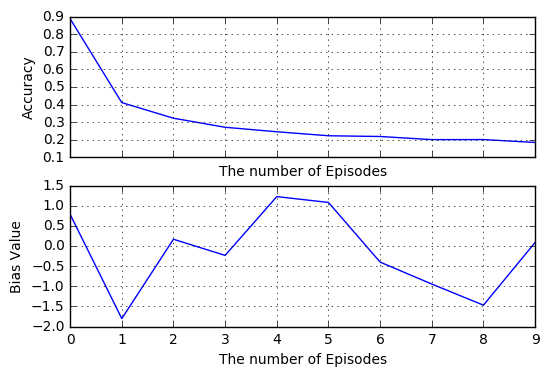

In [54]:
lr = LogisticRegression()
plot_data = lr.train(x_trains, y_trains)

figure, axarr = subplots(2, sharex=True)
axarr[0].plot(plot_data['costs'], label='cost')
axarr[0].set_xlabel('The number of Episodes')
axarr[0].set_ylabel('Accuracy')
axarr[0].grid()

axarr[1].plot(plot_data['bias'], label='bias')
axarr[1].set_xlabel('The number of Episodes')
axarr[1].set_ylabel('Bias Value')
axarr[1].grid()

print 'Evaluate:', lr.evaluate(x_tests, y_tests)